In [34]:
import pandas as pd
import scanpy as sc
import anndata as ad

Read the data

In [35]:
adata = sc.read_csv("ovary.tsv", delimiter = '\t', first_column_names=True)
adata= adata.T
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 7549 × 11944

Preprocessing

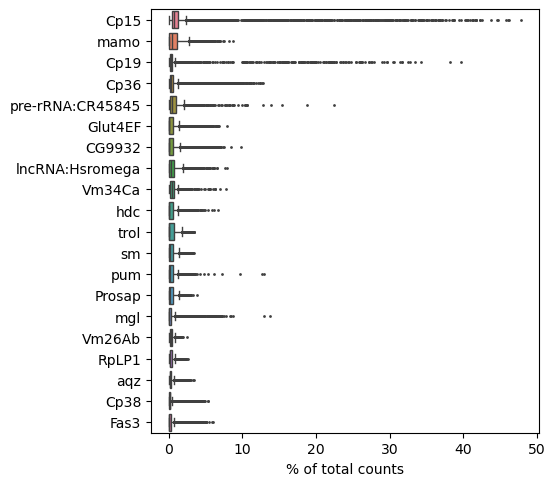

In [36]:
# look at the highest expressed genes
sc.pl.highest_expr_genes(adata, n_top=20)

In [37]:
#filter out cells with low gene count and genes that are only detected in few cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [38]:
# annotate the group of mitochondrial genes as "mt" 
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)
#WHAT SHOULD WE DO HERE ?

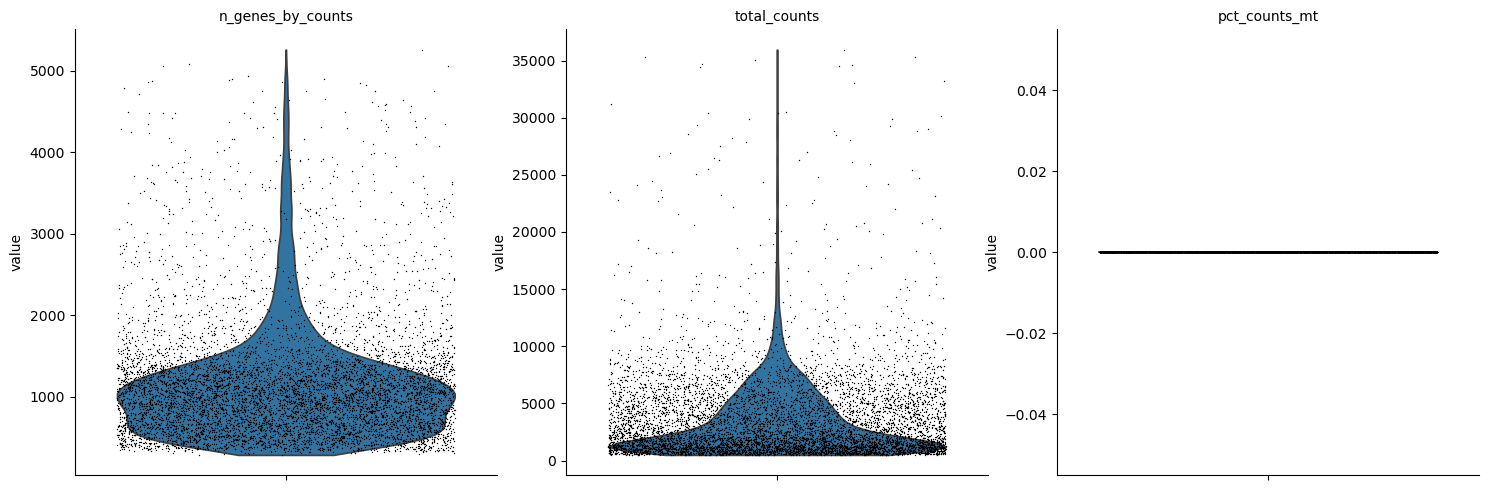

In [39]:
# Violin plot
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

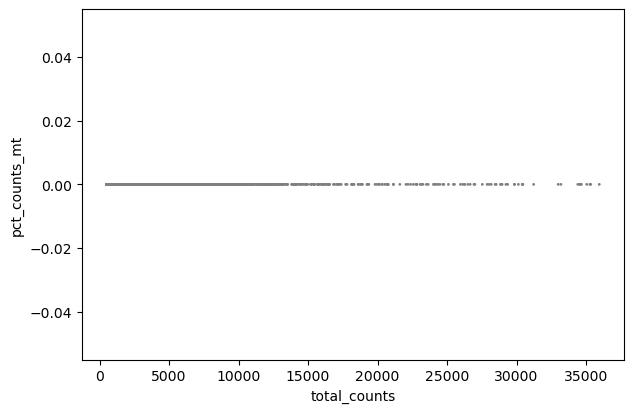

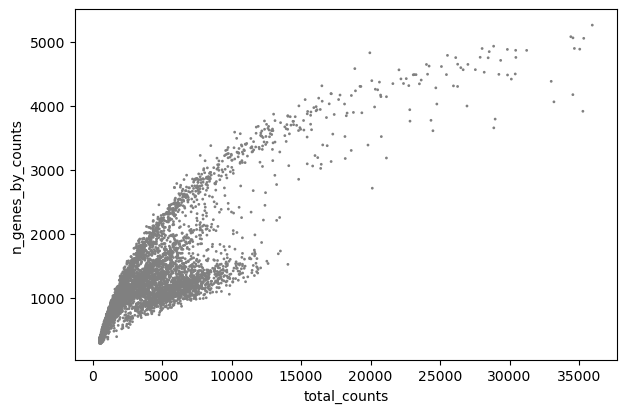

In [40]:
#scatter plots
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [41]:
#FOR KNOW NO FILTERING
#adata = adata[adata.obs.n_genes_by_counts < 5000, :]
#since we dont have any mitochondrial data there is no need to filter with it
#adata = adata[adata.obs.pct_counts_mt < 5, :].copy() 

In [42]:
#normalize the total count so that the counts become comparable among cells
sc.pp.normalize_total(adata, target_sum=1e4)
# take the log of the data
sc.pp.log1p(adata)

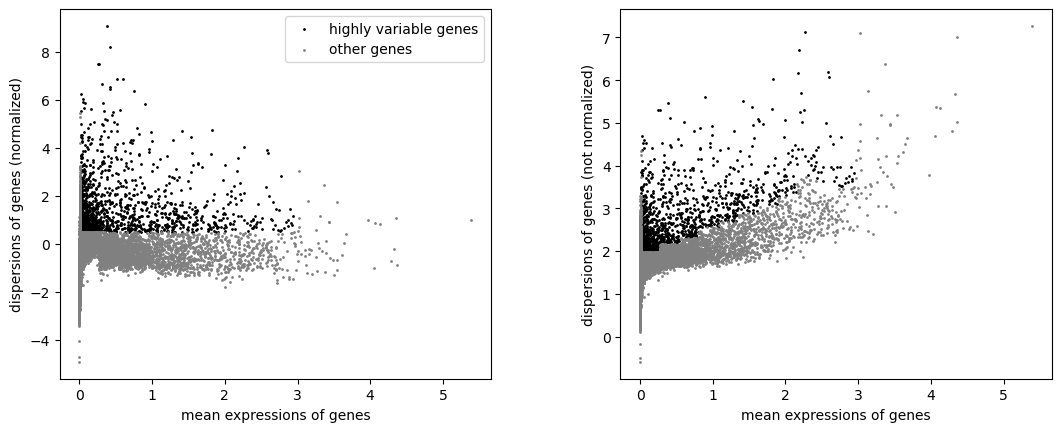

In [43]:
#look at the highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [44]:
#Set the normalized and logarithmized gene expr for later use to .raw
adata.raw = adata.copy()

#filter 
adata = adata[:, adata.var.highly_variable]
#regress out effects of total count per cell
sc.pp.regress_out(adata, ["total_counts"])
#scale the values
sc.pp.scale(adata, max_value=10)

c:\Users\Gianna Biino\anaconda3\envs\singlecell\Lib\site-packages\scanpy\preprocessing\_simple.py:672: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


PCA

In [45]:
#compute the PCA
sc.tl.pca(adata, svd_solver="arpack")

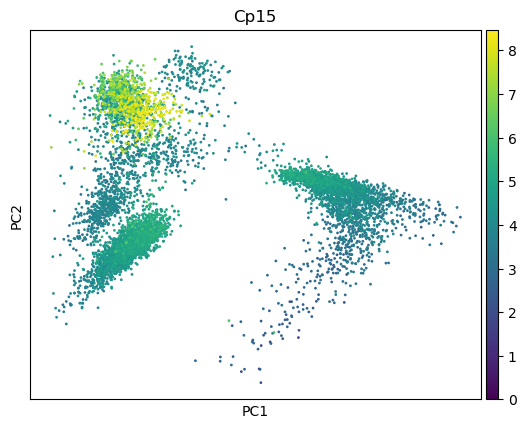

In [46]:
# plot the PCA for the gene Cp15
sc.pl.pca(adata, color="Cp15")

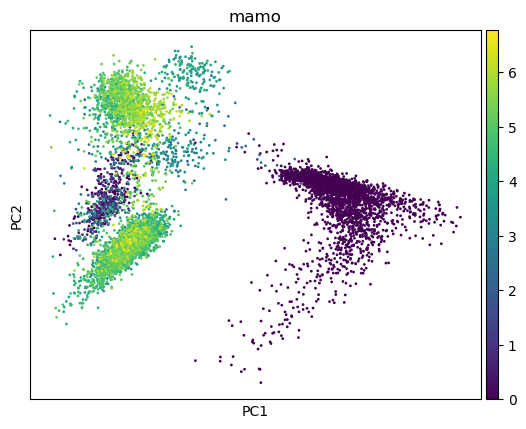

In [47]:
# plot the PCA for the gene mamo
sc.pl.pca(adata, color="mamo")